In [1]:
import cv2
import numpy as np
from skimage.measure import compare_ssim, compare_nrmse
import imutils
import matplotlib.pyplot as plt
from PIL import Image
import glob

%matplotlib inline

### Omaha

In [2]:
img8 = cv2.imread('./images/omaha_before.jpg')
img9 = cv2.imread('./images/omaha_after.jpg')

In [3]:
gray8 = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)
gray9 = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)

In [4]:
diff = cv2.absdiff(img8, img9)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

## find the nozero regions in the gray
imask =  gray>0

## create a Mat like img2
canvas = np.zeros_like(img9, np.uint8)

## set mask 
canvas[imask] = img9[imask]
cv2.imwrite('./Diff_result_images/result_omaha_pair.png', canvas)

True

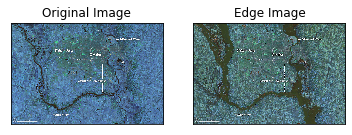

In [5]:
plt.subplot(121),plt.imshow(img8,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img9,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

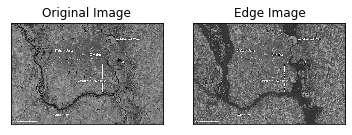

In [6]:
plt.subplot(121),plt.imshow(gray8,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray9,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
(score, diff) = compare_ssim(gray8, gray9, multichannel=True, full=True)
diff = (diff * 255).astype("uint8")

In [8]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

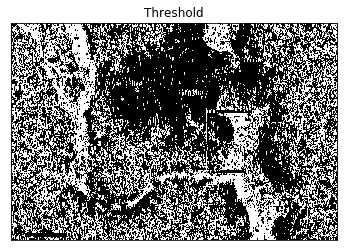

In [9]:
plt.subplot(),plt.imshow(thresh,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

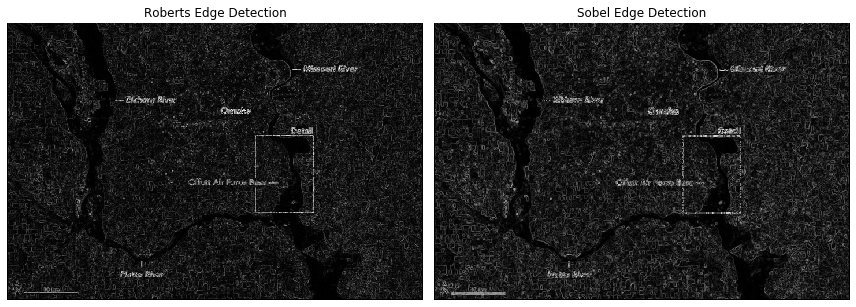

In [37]:
from skimage.filters import roberts, sobel


edge_roberts = roberts(gray9)
edge_sobel = sobel(gray9)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(12, 10))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [40]:
edge_roberts[60]

array([0.        , 0.05552864, 0.03921569, 0.07940571, 0.06106828,
       0.03339095, 0.05232025, 0.01960784, 0.02018751, 0.06473558,
       0.03339095, 0.03384839, 0.0623147 , 0.01176471, 0.01999615,
       0.02495671, 0.1310649 , 0.11846124, 0.01941077, 0.02895063,
       0.0623147 , 0.08084521, 0.11043238, 0.03892046, 0.0766965 ,
       0.09625833, 0.02999423, 0.01413942, 0.09083321, 0.09625833,
       0.05098039, 0.02630668, 0.12182137, 0.02385397, 0.01386484,
       0.05090492, 0.07129278, 0.00554594, 0.02630668, 0.03730647,
       0.08060708, 0.11382686, 0.01960784, 0.01413942, 0.03862297,
       0.02895063, 0.00620054, 0.01143324, 0.05829831, 0.06335488,
       0.11659662, 0.13115287, 0.01176471, 0.02369225, 0.0316167 ,
       0.01568627, 0.00784314, 0.00554594, 0.00620054, 0.04960436,
       0.01616904, 0.01960784, 0.01753779, 0.00999808, 0.01568627,
       0.00392157, 0.00999808, 0.00392157, 0.00876889, 0.00784314,
       0.01176471, 0.2008249 , 0.06544439, 0.13909136, 0.03339

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(gray8, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(gray9, (x, y), (x + w, y + h), (0, 0, 255), 2)
    


In [89]:
cv2.imshow("Original", img8)
cv2.imshow("Modified", img9)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows(0)

True

In [ ]:
# write files to Diff_result_images
cv2.imwrite('./Diff_result_images/Original_omaha_pair.jpg', img0)
cv2.imwrite('./Diff_result_images/Modified_omaha_pair.jpg', img1)
cv2.imwrite('./Diff_result_images/Difference_omaha_pair.jpg', diff)
cv2.imwrite('./Diff_result_images/Thresh_omaha_pair.jpg', thresh)

### first pair

In [10]:
img0 = cv2.imread('Outputimages/cropped0.jpg')
img1 = cv2.imread('Outputimages/cropped1.jpg')

In [11]:
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [12]:
diff = cv2.absdiff(img0, img1)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

## find the nozero regions in the gray
imask =  gray>0

## create a Mat like img2
canvas = np.zeros_like(img1, np.uint8)

## set mask 
canvas[imask] = img1[imask]
cv2.imwrite('./Diff_result_images/result_1_pair.png', canvas)

True

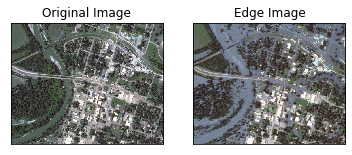

In [13]:
plt.subplot(121),plt.imshow(img0,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

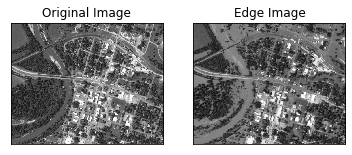

In [14]:
plt.subplot(121),plt.imshow(gray0,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
(score, diff) = compare_ssim(gray0, gray1, multichannel=True, full=True)
diff = (diff * 255).astype("uint8")

In [16]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

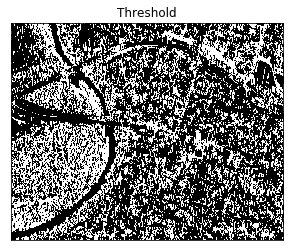

In [17]:
plt.subplot(),plt.imshow(thresh,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
thresh.shape

(395, 495)

In [19]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(gray0, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(gray1, (x, y), (x + w, y + h), (0, 0, 255), 2)

In [20]:
cv2.imshow("Original", img0)
cv2.imshow("Modified", img1)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows(0)

True

In [ ]:
# writing files to Diff_result_images

cv2.imwrite('./Diff_result_images/Original_1_pair.jpg', img0)
cv2.imwrite('./Diff_result_images/Modified_1_pair.jpg', img1)
cv2.imwrite('./Diff_result_images/Difference_1_pair.jpg', diff)
cv2.imwrite('./Diff_result_images/Thresh_1_pair.jpg', thresh)

In [20]:
from skimage import measure

In [28]:
contours[0][:,1]

array([240.98787879, 240.9880597 , 240.99111111, 241.        ,
       241.97333333, 242.        , 242.9908046 , 242.        ,
       241.98961039, 241.99354839, 241.99529412, 242.        ,
       242.99562842, 243.        , 244.        , 245.        ,
       245.98987342, 246.        , 247.        , 248.        ,
       249.        , 250.        , 250.0064    , 251.        ,
       252.        , 253.        , 253.99223301, 253.99452055,
       253.        , 252.99402985, 252.        , 251.9826087 ,
       251.97777778, 251.        , 250.        , 249.0109589 ,
       249.01290323, 249.        , 248.0057554 , 248.        ,
       247.        , 246.        , 245.        , 244.        ,
       243.        , 242.        , 241.        , 240.        ,
       239.02222222, 239.0195122 , 239.0119403 , 239.        ,
       238.00470588, 238.        , 237.        , 236.        ,
       235.        , 234.        , 233.        , 232.        ,
       231.00824742, 231.00432432, 231.00437158, 231.00

In [30]:
contours[0][:,0]

array([ 0.        ,  1.        ,  2.        ,  2.02666667,  3.        ,
        3.0091954 ,  4.        ,  4.9908046 ,  5.        ,  6.        ,
        7.        ,  7.00437158,  8.        ,  8.00615385,  8.00733945,
        8.01012658,  9.        ,  9.01454545,  9.01568627,  9.00695652,
        9.00506329,  9.00467836,  9.        ,  8.0064    ,  8.008     ,
        8.00776699,  9.        , 10.        , 10.99452055, 11.        ,
       11.99402985, 12.        , 13.        , 13.97777778, 13.9890411 ,
       13.        , 12.        , 11.9942446 , 11.        , 10.99304348,
       10.98431373, 10.98545455, 10.98666667, 10.9875    , 10.98666667,
       10.98545455, 10.98      , 10.97777778, 10.        ,  9.        ,
        8.        ,  7.99529412,  7.        ,  6.995     ,  6.99493671,
        6.99111111,  6.99012346,  6.99349593,  6.99440559,  6.99175258,
        6.        ,  5.        ,  4.        ,  3.        ,  2.0091954 ,
        2.00869565,  2.        ,  1.01025641,  1.        ,  0.  

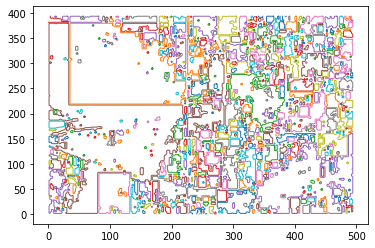

In [34]:
fig, ax = plt.subplots()

for contour in contours:
    ax.plot(contour[:,1], contour[:,0], linewidth=1)

In [29]:
contours[0]

array([[  0.        , 240.98787879],
       [  1.        , 240.9880597 ],
       [  2.        , 240.99111111],
       [  2.02666667, 241.        ],
       [  3.        , 241.97333333],
       [  3.0091954 , 242.        ],
       [  4.        , 242.9908046 ],
       [  4.9908046 , 242.        ],
       [  5.        , 241.98961039],
       [  6.        , 241.99354839],
       [  7.        , 241.99529412],
       [  7.00437158, 242.        ],
       [  8.        , 242.99562842],
       [  8.00615385, 243.        ],
       [  8.00733945, 244.        ],
       [  8.01012658, 245.        ],
       [  9.        , 245.98987342],
       [  9.01454545, 246.        ],
       [  9.01568627, 247.        ],
       [  9.00695652, 248.        ],
       [  9.00506329, 249.        ],
       [  9.00467836, 250.        ],
       [  9.        , 250.0064    ],
       [  8.0064    , 251.        ],
       [  8.008     , 252.        ],
       [  8.00776699, 253.        ],
       [  9.        , 253.99223301],
 

[]

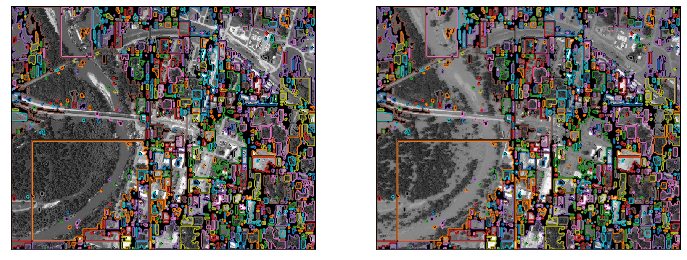

In [36]:
contours = measure.find_contours(gray0, 0.8)

# Display the image and plot all contours found
fig, (axleft, axright) = plt.subplots(figsize=(12,10), ncols=2)
axleft.imshow(gray0, cmap=plt.cm.gray)
axright.imshow(gray1, cmap=plt.cm.gray)

for contour in contours:
    axleft.plot(contour[:, 1], contour[:, 0], linewidth=1)
    axright.plot(contour[:, 1], contour[:, 0], linewidth=1)


#ax.axis('image')
axleft.set_xticks([])
axleft.set_yticks([])
axright.set_xticks([])
axright.set_yticks([])

### second pair

In [37]:
img2 = cv2.imread('Outputimages/cropped2.jpg')
img3 = cv2.imread('Outputimages/cropped3.jpg')

In [38]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [39]:
diff = cv2.absdiff(img2, img3)
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

## find the nozero regions in the gray
imask =  gray>0

## create a Mat like img2
canvas = np.zeros_like(img3, np.uint8)

## set mask 
canvas[imask] = img3[imask]
cv2.imwrite('./Diff_result_images/result_2_pair.png', canvas)

True

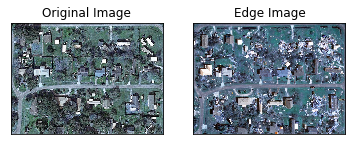

In [40]:
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

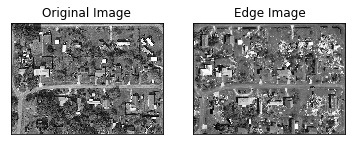

In [41]:
plt.subplot(121),plt.imshow(gray2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray3,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [42]:
(score, diff) = compare_ssim(gray2, gray3, multichannel=True, full=True)
diff = (diff * 255).astype("uint8")

In [43]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

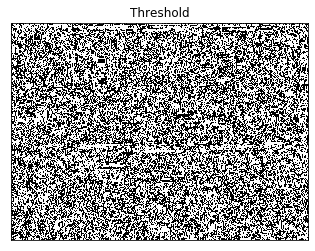

In [44]:
plt.subplot(),plt.imshow(thresh,cmap = 'gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

In [67]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(gray2, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(gray3, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2.imshow("Original", img2)
cv2.imshow("Modified", img3)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows(0)

True

In [31]:
# writing files to Diff_result_images

cv2.imwrite('./Diff_result_images/Original_2_pair.jpg', img0)
cv2.imwrite('./Diff_result_images/Modified_2_pair.jpg', img1)
cv2.imwrite('./Diff_result_images/Difference_2_pair.jpg', diff)
cv2.imwrite('./Diff_result_images/Thresh_2_pair.jpg', thresh)